In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart_disease_uci.csv")

In [4]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

In [9]:
df['chol'] = df['chol'].fillna(df['chol'].mean())

In [10]:
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())

In [11]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [12]:
df['ca'] = df['ca'].fillna(df['ca'].mean())

In [13]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [22]:
df = df.dropna(axis=1)

In [23]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
num         0
dtype: int64

In [24]:
df.shape

(920, 11)

In [25]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,150.0,2.3,0.0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,108.0,1.5,3.0,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,129.0,2.6,2.0,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,187.0,3.5,0.0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,172.0,1.4,0.0,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,178.0,0.8,0.0,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,160.0,3.6,2.0,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,163.0,0.6,0.0,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,147.0,1.4,1.0,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,155.0,3.1,0.0,1


In [27]:
df = df.rename(columns={'cp':'Chest Pain'})

In [28]:
df = df.rename(columns={'trestbps':'Resting Blood Pressure'})

In [29]:
df = df.rename(columns={'chol':'Serum cholesterol level'})

In [30]:
df = df.rename(columns={'thalch':'Max Heart rate Achieved'})

In [32]:
df['Resting Blood Pressure'] = df['Resting Blood Pressure'].astype(int)

In [34]:
df['Serum cholesterol level'] = df['Serum cholesterol level'].astype(int)

In [35]:
df

,id,age,sex,dataset,Chest Pain,Resting Blood Pressure,Serum cholesterol level,Max Heart rate Achieved,oldpeak,ca,num
0,1,63,Male,Cleveland,typical angina,145,233,150.000000,2.300000,0.000000,0
1,2,67,Male,Cleveland,asymptomatic,160,286,108.000000,1.500000,3.000000,2
2,3,67,Male,Cleveland,asymptomatic,120,229,129.000000,2.600000,2.000000,1
3,4,37,Male,Cleveland,non-anginal,130,250,187.000000,3.500000,0.000000,0
4,5,41,Female,Cleveland,atypical angina,130,204,172.000000,1.400000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,154.000000,0.000000,0.676375,1
916,917,62,Male,VA Long Beach,typical angina,132,139,137.545665,0.878788,0.676375,0
917,918,55,Male,VA Long Beach,asymptomatic,122,223,100.000000,0.000000,0.676375,2
918,919,58,Male,VA Long Beach,asymptomatic,132,385,137.545665,0.878788,0.676375,0


In [52]:
df_1 = df[['id','age','sex','Chest Pain']]


In [53]:
df_1

,id,age,sex,Chest Pain
0,1,63,Male,typical angina
1,2,67,Male,asymptomatic
2,3,67,Male,asymptomatic
3,4,37,Male,non-anginal
4,5,41,Female,atypical angina
...,...,...,...,...
915,916,54,Female,asymptomatic
916,917,62,Male,typical angina
917,918,55,Male,asymptomatic
918,919,58,Male,asymptomatic


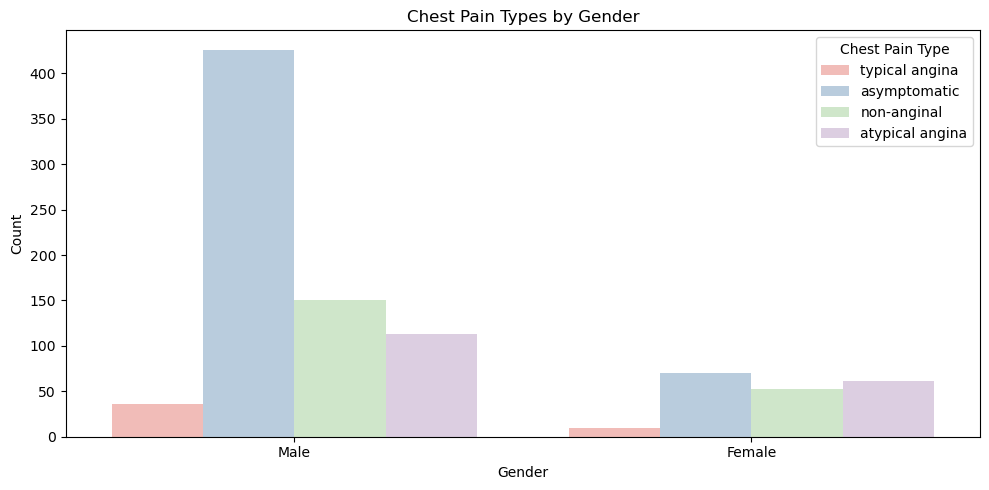

In [61]:
# Assuming df_1 is your DataFrame
plt.figure(figsize=(10, 5))

# Countplot handles categorical counts and works better for this case
sns.countplot(data=df_1, x='sex', hue='Chest Pain', palette='Pastel1')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Chest Pain Types by Gender')
plt.legend(title='Chest Pain Type')
plt.tight_layout()
plt.show()

In [62]:
df_2 = df[['id','age','sex','Resting Blood Pressure','Serum cholesterol level']]
df_2

,id,age,sex,Resting Blood Pressure,Serum cholesterol level
0,1,63,Male,145,233
1,2,67,Male,160,286
2,3,67,Male,120,229
3,4,37,Male,130,250
4,5,41,Female,130,204
...,...,...,...,...,...
915,916,54,Female,127,333
916,917,62,Male,132,139
917,918,55,Male,122,223
918,919,58,Male,132,385


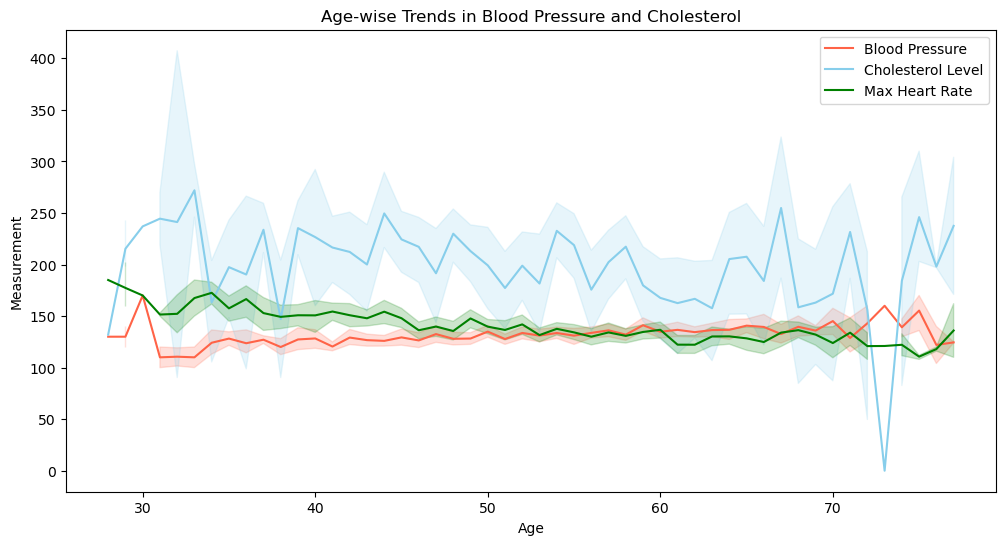

In [69]:
# Assuming your DataFrame is called df_2
plt.figure(figsize=(12, 6))

# Line for Resting Blood Pressure
sns.lineplot(data=df_2, x='age', y='Resting Blood Pressure', label='Blood Pressure', color='tomato')

# Line for Serum Cholesterol
sns.lineplot(data=df_2, x='age', y='Serum cholesterol level', label='Cholesterol Level', color='skyblue')

sns.lineplot(data=df, x='age', y='Max Heart rate Achieved', label='Max Heart Rate', color='green')
plt.title('Age-wise Trends in Blood Pressure and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Measurement')
plt.legend()
plt.show()


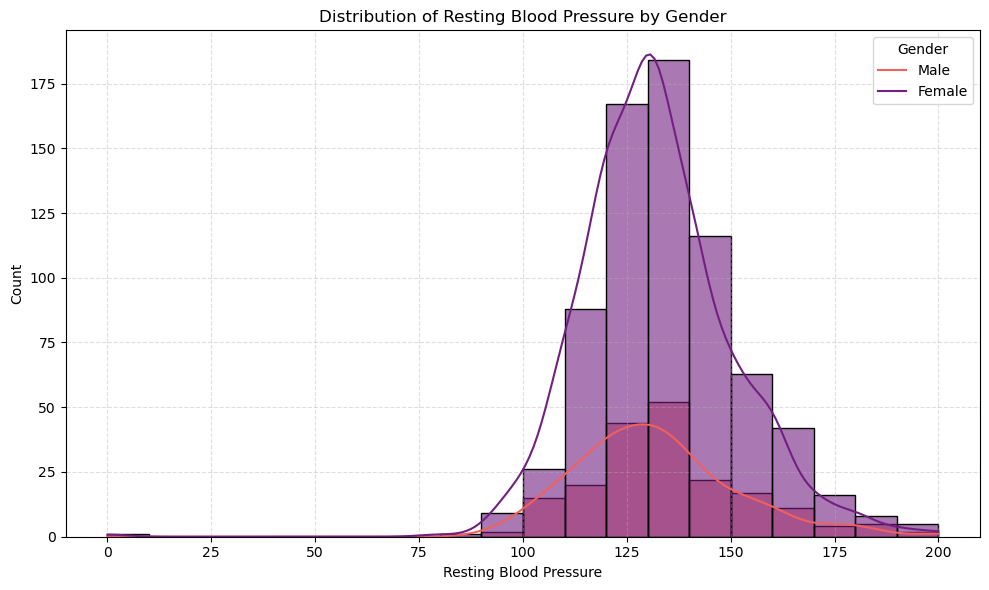

In [92]:
plt.figure(figsize=(10, 6))

# Histogram with hue = sex to compare males vs females
sns.histplot(data=df_2, x='Resting Blood Pressure', hue='sex', bins=20,
             palette='magma', alpha=0.6, edgecolor='black',kde=True)

plt.title('Distribution of Resting Blood Pressure by Gender')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male','Female'])
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()